In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import sunpath
import math
from datetime import datetime, timedelta, timezone

# INPUTS #
latitude = 24.43
longitude = 54.65
elevation = 25.5
year = 1992
month = 12
day = 13
hour = 11
minute = 22
second = 31
time_zone = 1

daylight_saving = False

# CALCULATIONS
dt = datetime(year, month, day, hour, minute, second, tzinfo=timezone(timedelta(hours=time_zone)))

s = sunpath.Sunpath(latitude=latitude, longitude=longitude, time_zone=time_zone, north_angle=0, daylight_saving_period=daylight_saving)
dts = sunpath.DateTime(month=dt.month, day=dt.day, hour=dt.hour, minute=dt.minute)

s.calculate_sun_from_date_time(dts).altitude, s.calculate_sun_from_date_time(dts).azimuth

(41.78970846846914, 170.05778320818717)

In [62]:
from datetime import datetime, time, timedelta, timezone
import math

# VARIABLES #
latitude = 24.43
longitude = 54.65
elevation = 25.5
year = 1992
month = 12
day = 13
hour = 11
minute = 22
second = 31
time_zone = 1
daylight_saving = True

dt = datetime(year, month, day, hour, minute, second)
#, tzinfo=timezone(timedelta(hours=utc_offset))

def is_leap_year(year):
    """Determine whether a year is a leap year."""
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

def days_since_1900(dt):
    return (dt - datetime(1900, 1, 1)).days

julian_day = days_since_1900(dt) + 2415018.5 + (dt - datetime.combine(dt.date(), time(0))).total_seconds()/86400 - (float(time_zone) / 24)

julian_century = (julian_day - 2451545) / 36525

geom_mean_long_sun = (280.46646 + julian_century * (36000.76983 + julian_century * 0.0003032)) % 360

geom_mean_anom_sun = 357.52911 + julian_century * (35999.05029 - 0.0001537 * julian_century)

eccent_orbit = 0.016708634 - julian_century * (0.000042037 + 0.0000001267 * julian_century)

sun_eq_of_ctr = math.sin(math.radians(geom_mean_anom_sun)) * (1.914602 - julian_century * (0.004817 + 0.000014 * julian_century)) + math.sin(math.radians(2 * geom_mean_anom_sun)) * (0.019993 - 0.000101 * julian_century) + math.sin(math.radians(3 * geom_mean_anom_sun)) * 0.000289

sun_true_long = geom_mean_long_sun + sun_eq_of_ctr

sun_app_long = sun_true_long - 0.00569 - 0.00478 * math.sin(math.radians(125.04 - 1934.136 * julian_century))

mean_obliq_ecliptic = 23 + (26 + ((21.448 - julian_century * (46.815 + julian_century * (0.00059 - julian_century * 0.001813)))) / 60) / 60

oblique_corr = mean_obliq_ecliptic + 0.00256 * math.cos(math.radians(125.04 - 1934.136 * julian_century))

sol_dec = math.degrees(math.asin(math.sin(math.radians(oblique_corr)) * math.sin(math.radians(sun_app_long))))

var_y = math.tan(math.radians(oblique_corr / 2)) * math.tan(math.radians(oblique_corr / 2))

eq_of_time = 4 * math.degrees(var_y * math.sin(2 * math.radians(geom_mean_long_sun)) - 2 * eccent_orbit * math.sin(math.radians(geom_mean_anom_sun)) + 4 * eccent_orbit * var_y * math.sin(math.radians(geom_mean_anom_sun)) * math.cos(2 * math.radians(geom_mean_long_sun)) - 0.5 * (var_y ** 2) * math.sin(4 * math.radians(geom_mean_long_sun)) - 1.25 * (eccent_orbit ** 2) * math.sin(2 * math.radians(geom_mean_anom_sun)))

sol_time = ((dt.hour * 60 + eq_of_time + 4 * longitude - 60 * time_zone) % 1440) / 60

hour_angle = sol_time / 4 + 180 if sol_time / 4 < 0 else sol_time / 4 - 180

zenith = math.degrees(math.acos(math.sin(math.radians(latitude)) * math.sin(math.radians(sol_dec)) + math.cos(math.radians(latitude)) * math.cos(math.radians(sol_dec)) * math.cos(math.radians(hour_angle))))

altitude = 90 - zenith

"""
if altitude > 85:
            atmos_refraction = 0
        else:
            if altitude > 5:
                atmos_refraction = 58.1 / math.tan(math.radians(altitude))

                - 0.07 / (math.tan(math.radians(altitude)))**3
                + 0.000086 / (math.tan(math.radians(altitude)))**5
            else:
                if altitude > -0.575:
                    atmos_refraction = 1735

                    + altitude * (-518.2 + altitude *
                                  (103.4 + altitude *
                                   (-12.79 + altitude * 0.711)))
                else:

                    atmos_refraction = -20.772 / math.tan(
                        math.radians(altitude))

        atmos_refraction /= 3600

        altitude += atmos_refraction

        # Degrees
        if hour_angle > 0:
            azimuth = (math.degrees(
                math.acos(
                    (
                        (math.sin(self._latitude) *
                         math.cos(math.radians(zenith))) -
                        math.sin(math.radians(sol_dec))) /
                    (math.cos(self._latitude) *
                     math.sin(math.radians(zenith)))
                )
            ) + 180) % 360
        else:
            azimuth = (540 - math.degrees(math.acos((
                (math.sin(self._latitude) *
                 math.cos(math.radians(zenith))) -
                math.sin(math.radians(sol_dec))) /
                (math.cos(self._latitude) *
                 math.sin(math.radians(zenith))))
            )) % 360

        altitude = math.radians(altitude)
        azimuth = math.radians(azimuth)
"""

altitude

-86.5575531543567

([297.85036, 445267.11148, -0.0019142, 189474.0], -0.10050414601110132)

In [6]:
sun.aberration_coefficients

{'ArgumentOfLatitudeOfMoon': [93.27191, 483202.017538, -0.0036825, 327270.0],
 'LongitudeOfAscendingNode': [125.04452, -1934.136261, 0.0020708, 450000.0],
 'MeanElongationOfMoon': [297.85036, 445267.11148, -0.0019142, 189474.0],
 'MeanAnomalyOfMoon': [134.96298, 477198.867398, 0.0086972, 56250.0],
 'MeanAnomalyOfSun': [357.52772, 35999.05034, -0.0001603, -300000.0]}

In [8]:
import math
from datetime import datetime, timedelta, timezone

d = datetime(1989, 12, 13, 14, 34, 21, tzinfo=timezone(timedelta(hours=0)))

def get_julian_ephemeris_day(dt):
    """returns the TT Julian day number (including fraction of a day) corresponding to the specified date/time.
    This version assumes the proleptic Gregorian calendar; trying to adjust for pre-Gregorian dates/times seems
    pointless when the changeover happened over such wildly varying times in different regions.
    """
    return ((dt.timestamp() + get_leap_seconds() + tt_offset) / seconds_per_day + gregorian_day_offset + julian_day_offset)


def get_julian_century(julian_day):
    return (julian_day - 2451545.0) / 36525.0

def get_julian_ephemeris_century(julian_ephemeris_day):
    return (julian_ephemeris_day - 2451545.0) / 36525.0

def get_julian_ephemeris_millennium(julian_ephemeris_century):


def equation_of_time(yday):
    """returns the number of minutes to add to mean solar time to get actual solar time."""
    b = 2 * math.pi / 364.0 * (yday - 81)
    return 9.87 * math.sin(2 * b) - 7.53 * math.cos(b) - 1.5 * math.sin(b)



def get_sun_earth_distance(jme):
    return get_coeff(jme, constants.sun_earth_distance_coeffs) / 1e8

def get_aberration_correction(sun_earth_distance):
    """sun-earth distance is in astronomical units"""
    return -20.4898 / (3600.0 * sun_earth_distance)

equation_of_time(d.timetuple().tm_yday)

4.758750119987872

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysolar_ripoff
import pandas as pd

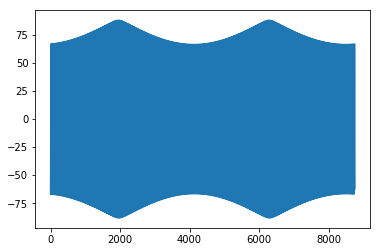

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysolar_ripoff
import pandas as pd
dts = pd.DatetimeIndex(start="1989-01-01 00:00", end="1990-01-01 00:00", freq="60T", closed="left")

tz = 0
lat = 0
lon = 0

alts = []
azs = []
for d in dts:
    alts.append(pysolar_ripoff.Sun(
        latitude = lat,
        longitude = lon,
        elevation = 0,
        year = d.year,
        month = d.month,
        day = d.day,
        hour = d.hour,
        minute = d.minute,
        second = 0,
        microsecond = 0,
        utc_offset = 1,
    ).get_altitude_fast())
#     azs.append(pysolar_ripoff.Sun(
#         latitude = lat,
#         longitude = lon,
#         elevation = 0,
#         year = d.year,
#         month = d.month,
#         day = d.day,
#         hour = d.hour,
#         minute = d.minute,
#         second = 0,
#         microsecond = 0,
#         utc_offset = 1,
#     ).get_azimuth_fast())

pd.Series(alts).plot()

In [ ]:
sun.get_azimuth_fast()

In [ ]:
from datetime import datetime, timedelta, timezone
d = datetime(1989, 8, 13, 14, 31, 22, 134, tzinfo=timezone(timedelta(hours=3)))
d.utctimetuple()

In [ ]:



def get_leap_seconds(when):
    "returns adjustment to be added to UTC at the specified datetime to produce TAI."
    when = when.utctimetuple()
    adj = 10 # as decreed from 1972
    year = leap_seconds_base_year
    while True :
        if year > when.tm_year :
            break
        if year - leap_seconds_base_year >= len(leap_seconds_adjustments) :
            if (
                    when.tm_year - leap_seconds_base_year > len(leap_seconds_adjustments)
                or
                        when.tm_year - leap_seconds_base_year == len(leap_seconds_adjustments)
                    and
                        when.tm_mon > 6
            ) :
                warnings.warn \
                  (
                        "I don't know about leap seconds after %d"
                    %
                        (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)
                  )
            #end if
            break
        #end if
        entry = leap_seconds_adjustments[year - leap_seconds_base_year]
        if year == when.tm_year :
            if when.tm_mon > 6 :
                adj += entry[0]
            #end if
            break
        #end if
        adj += entry[0] + entry[1]
        year += 1
    #end while
    return \
        adj
#end get_leap_seconds

d = datetime.datetime(2018, 1, 1, 0, 0, 0)

get_leap_seconds(d)